In [342]:
import pandas as pd

In [343]:
df = pd.read_csv(r'C:\Amita\RISC Internship\utilities-customer-attrition-prediction-industry-accelerator\assets\data_asset\Attrition View.csv')

In [344]:
pd.set_option('display.max_columns', None)
df.describe(include= 'all')

,CUSTOMER_ID,GENDER_ID,FIRST_NAME,LAST_NAME,PHONE_1,EMAIL,AGE,ENERGY_USAGE_PER_MONTH,ENERGY_EFFICIENCY,IS_REGISTERED_FOR_ALERTS,OWNS_HOME,COMPLAINTS,ATTRITION_STATUS,HAS_THERMOSTAT,HAS_HOME_AUTOMATION,PV_ZONING,WIND_ZONING,SMART_METER_COMMENTS,IS_CAR_OWNER,HAS_EV,HAS_PV,HAS_WIND,TENURE,EBILL,IN_WARRANTY,CITY,CURRENT_OFFER,CURRENT_CONTRACT,CURRENT_ISSUE,MARITAL_STATUS,EDUCATION,SEGMENT,EMPLOYMENT,STD_YRLY_USAGE_CUR_YEAR_MINUS_1,STD_YRLY_USAGE_CUR_YEAR_MINUS_2,STD_YRLY_USAGE_CUR_YEAR_MINUS_3,STD_YRLY_USAGE_CUR_YEAR_MINUS_4,STD_YRLY_USAGE_CUR_YEAR_MINUS_5,STD_YRLY_USAGE_CUR_YEAR_MINUS_6,STD_YRLY_USAGE_CUR_YEAR_MINUS_7,MEDIAN_YRLY_USAGE_CUR_YEAR_MINUS_1
count,65000.000000,65000.000000,65000,65000,65000,65000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000,65000,58045,65000,65000,65000,53365,65000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000
unique,NaN,NaN,3007,474,1000,65000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,9,2,9,3,9,3,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Charlene,Terry,781-757-3537,Leonor.Cummerata@nola.biz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Santa Clara,Home Energy Audits,Time of Use,Drop Calls,S,Associate degree,SILVER,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,39,171,65,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16250,45565,29705,17875,26065,17645,31850,27430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,32500.500000,1.604000,NaN,NaN,NaN,NaN,41.784538,7471.920000,0.497283,0.601000,0.802000,0.332000,0.297815,0.580000,0.627000,0.473000,0.520000,NaN,0.626000,0.319662,0.164123,0.170708,35.526000,0.371000,0.505000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17980.432308,14130.525354,8823.809831,8814.207354,9207.505554,8756.042046,7209.785600,15304.744769
std,18764.028086,0.489068,NaN,NaN,NaN,NaN,17.299805,3795.247833,0.142717,0.489697,0.398495,0.470935,0.457301,0.493562,0.483606,0.499274,0.499604,NaN,0.483867,0.466349,0.370390,0.376256,21.349294,0.483076,0.499979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12539.565361,9836.637840,6129.340361,6123.881811,6378.825718,6080.546917,5014.379645,10175.687139
min,1.000000,1.000000,NaN,NaN,NaN,NaN,15.000000,1310.000000,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,740.000000,740.000000,987.000000,987.000000,987.000000,987.000000,740.000000,3210.000000
25%,16250.750000,1.000000,NaN,NaN,NaN,NaN,28.000000,4357.500000,0.376000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7160.000000,6666.000000,2963.000000,2963.000000,2963.000000,2963.000000,3703.000000,3210.000000
50%,32500.500000,2.000000,NaN,NaN,NaN,NaN,41.000000,6920.000000,0.462000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,34.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16543.000000,12592.000000,6913.000000,6913.000000,8888.000000,6913.000000,6666.000000,20500.000000
75%,48750.250000,2.000000,NaN,NaN,NaN,NaN,55.000000,9810.000000,0.602000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,0.000000,0.000000,54.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26913.000000,21481.000000,12839.000000,12839.000000,12839.000000,12839.000000,11111.000000,26900.000000


We have missing values in current_contract and segment

In [345]:
df.shape

(65000, 41)

In [346]:
import pandas as pd

# Set display options to prevent truncation
pd.set_option('display.max_info_columns', len(df.columns))
pd.set_option('display.max_colwidth', None)  # Ensures column width isn't truncated
pd.set_option('display.expand_frame_repr', False)  # Prevents horizontal scrolling

# Use df.info()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65000 entries, 0 to 64999
Data columns (total 41 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   CUSTOMER_ID                         65000 non-null  int64  
 1   GENDER_ID                           65000 non-null  int64  
 2   FIRST_NAME                          65000 non-null  object 
 3   LAST_NAME                           65000 non-null  object 
 4   PHONE_1                             65000 non-null  object 
 5   EMAIL                               65000 non-null  object 
 6   AGE                                 65000 non-null  int64  
 7   ENERGY_USAGE_PER_MONTH              65000 non-null  int64  
 8   ENERGY_EFFICIENCY                   65000 non-null  float64
 9   IS_REGISTERED_FOR_ALERTS            65000 non-null  int64  
 10  OWNS_HOME                           65000 non-null  int64  
 11  COMPLAINTS                          65000

In [347]:
df.columns

Index(['CUSTOMER_ID', 'GENDER_ID', 'FIRST_NAME', 'LAST_NAME', 'PHONE_1',
       'EMAIL', 'AGE', 'ENERGY_USAGE_PER_MONTH', 'ENERGY_EFFICIENCY',
       'IS_REGISTERED_FOR_ALERTS', 'OWNS_HOME', 'COMPLAINTS',
       'ATTRITION_STATUS', 'HAS_THERMOSTAT', 'HAS_HOME_AUTOMATION',
       'PV_ZONING', 'WIND_ZONING', 'SMART_METER_COMMENTS', 'IS_CAR_OWNER',
       'HAS_EV', 'HAS_PV', 'HAS_WIND', 'TENURE', 'EBILL', 'IN_WARRANTY',
       'CITY', 'CURRENT_OFFER', 'CURRENT_CONTRACT', 'CURRENT_ISSUE',
       'MARITAL_STATUS', 'EDUCATION', 'SEGMENT', 'EMPLOYMENT',
       'STD_YRLY_USAGE_CUR_YEAR_MINUS_1', 'STD_YRLY_USAGE_CUR_YEAR_MINUS_2',
       'STD_YRLY_USAGE_CUR_YEAR_MINUS_3', 'STD_YRLY_USAGE_CUR_YEAR_MINUS_4',
       'STD_YRLY_USAGE_CUR_YEAR_MINUS_5', 'STD_YRLY_USAGE_CUR_YEAR_MINUS_6',
       'STD_YRLY_USAGE_CUR_YEAR_MINUS_7',
       'MEDIAN_YRLY_USAGE_CUR_YEAR_MINUS_1'],
      dtype='object')

Dropping some columns that we won't require for the modelling purpose

In [348]:
columns_to_drop = ['FIRST_NAME', 'LAST_NAME', 'PHONE_1',
       'EMAIL']
df = df.drop(columns_to_drop, axis=1)

In [349]:
df.describe(include='all')

,CUSTOMER_ID,GENDER_ID,AGE,ENERGY_USAGE_PER_MONTH,ENERGY_EFFICIENCY,IS_REGISTERED_FOR_ALERTS,OWNS_HOME,COMPLAINTS,ATTRITION_STATUS,HAS_THERMOSTAT,HAS_HOME_AUTOMATION,PV_ZONING,WIND_ZONING,SMART_METER_COMMENTS,IS_CAR_OWNER,HAS_EV,HAS_PV,HAS_WIND,TENURE,EBILL,IN_WARRANTY,CITY,CURRENT_OFFER,CURRENT_CONTRACT,CURRENT_ISSUE,MARITAL_STATUS,EDUCATION,SEGMENT,EMPLOYMENT,STD_YRLY_USAGE_CUR_YEAR_MINUS_1,STD_YRLY_USAGE_CUR_YEAR_MINUS_2,STD_YRLY_USAGE_CUR_YEAR_MINUS_3,STD_YRLY_USAGE_CUR_YEAR_MINUS_4,STD_YRLY_USAGE_CUR_YEAR_MINUS_5,STD_YRLY_USAGE_CUR_YEAR_MINUS_6,STD_YRLY_USAGE_CUR_YEAR_MINUS_7,MEDIAN_YRLY_USAGE_CUR_YEAR_MINUS_1
count,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000,65000,58045,65000,65000,65000,53365,65000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,9,2,9,3,9,3,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Santa Clara,Home Energy Audits,Time of Use,Drop Calls,S,Associate degree,SILVER,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16250,45565,29705,17875,26065,17645,31850,27430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,32500.500000,1.604000,41.784538,7471.920000,0.497283,0.601000,0.802000,0.332000,0.297815,0.580000,0.627000,0.473000,0.520000,NaN,0.626000,0.319662,0.164123,0.170708,35.526000,0.371000,0.505000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17980.432308,14130.525354,8823.809831,8814.207354,9207.505554,8756.042046,7209.785600,15304.744769
std,18764.028086,0.489068,17.299805,3795.247833,0.142717,0.489697,0.398495,0.470935,0.457301,0.493562,0.483606,0.499274,0.499604,NaN,0.483867,0.466349,0.370390,0.376256,21.349294,0.483076,0.499979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12539.565361,9836.637840,6129.340361,6123.881811,6378.825718,6080.546917,5014.379645,10175.687139
min,1.000000,1.000000,15.000000,1310.000000,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,740.000000,740.000000,987.000000,987.000000,987.000000,987.000000,740.000000,3210.000000
25%,16250.750000,1.000000,28.000000,4357.500000,0.376000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7160.000000,6666.000000,2963.000000,2963.000000,2963.000000,2963.000000,3703.000000,3210.000000
50%,32500.500000,2.000000,41.000000,6920.000000,0.462000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,34.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16543.000000,12592.000000,6913.000000,6913.000000,8888.000000,6913.000000,6666.000000,20500.000000
75%,48750.250000,2.000000,55.000000,9810.000000,0.602000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,0.000000,0.000000,54.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26913.000000,21481.000000,12839.000000,12839.000000,12839.000000,12839.000000,11111.000000,26900.000000


In [350]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65000 entries, 0 to 64999
Data columns (total 37 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   CUSTOMER_ID                         65000 non-null  int64  
 1   GENDER_ID                           65000 non-null  int64  
 2   AGE                                 65000 non-null  int64  
 3   ENERGY_USAGE_PER_MONTH              65000 non-null  int64  
 4   ENERGY_EFFICIENCY                   65000 non-null  float64
 5   IS_REGISTERED_FOR_ALERTS            65000 non-null  int64  
 6   OWNS_HOME                           65000 non-null  int64  
 7   COMPLAINTS                          65000 non-null  int64  
 8   ATTRITION_STATUS                    65000 non-null  int64  
 9   HAS_THERMOSTAT                      65000 non-null  int64  
 10  HAS_HOME_AUTOMATION                 65000 non-null  int64  
 11  PV_ZONING                           65000

<Axes: ylabel='count'>

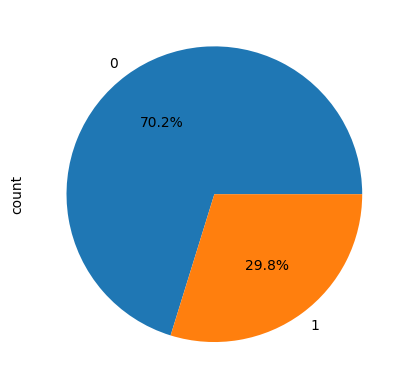

In [351]:
df['ATTRITION_STATUS'].value_counts().plot.pie(autopct="%0.1f%%")

In [352]:
df.columns

Index(['CUSTOMER_ID', 'GENDER_ID', 'AGE', 'ENERGY_USAGE_PER_MONTH',
       'ENERGY_EFFICIENCY', 'IS_REGISTERED_FOR_ALERTS', 'OWNS_HOME',
       'COMPLAINTS', 'ATTRITION_STATUS', 'HAS_THERMOSTAT',
       'HAS_HOME_AUTOMATION', 'PV_ZONING', 'WIND_ZONING',
       'SMART_METER_COMMENTS', 'IS_CAR_OWNER', 'HAS_EV', 'HAS_PV', 'HAS_WIND',
       'TENURE', 'EBILL', 'IN_WARRANTY', 'CITY', 'CURRENT_OFFER',
       'CURRENT_CONTRACT', 'CURRENT_ISSUE', 'MARITAL_STATUS', 'EDUCATION',
       'SEGMENT', 'EMPLOYMENT', 'STD_YRLY_USAGE_CUR_YEAR_MINUS_1',
       'STD_YRLY_USAGE_CUR_YEAR_MINUS_2', 'STD_YRLY_USAGE_CUR_YEAR_MINUS_3',
       'STD_YRLY_USAGE_CUR_YEAR_MINUS_4', 'STD_YRLY_USAGE_CUR_YEAR_MINUS_5',
       'STD_YRLY_USAGE_CUR_YEAR_MINUS_6', 'STD_YRLY_USAGE_CUR_YEAR_MINUS_7',
       'MEDIAN_YRLY_USAGE_CUR_YEAR_MINUS_1'],
      dtype='object')

In [353]:
import matplotlib.pyplot as plt
import seaborn as sns

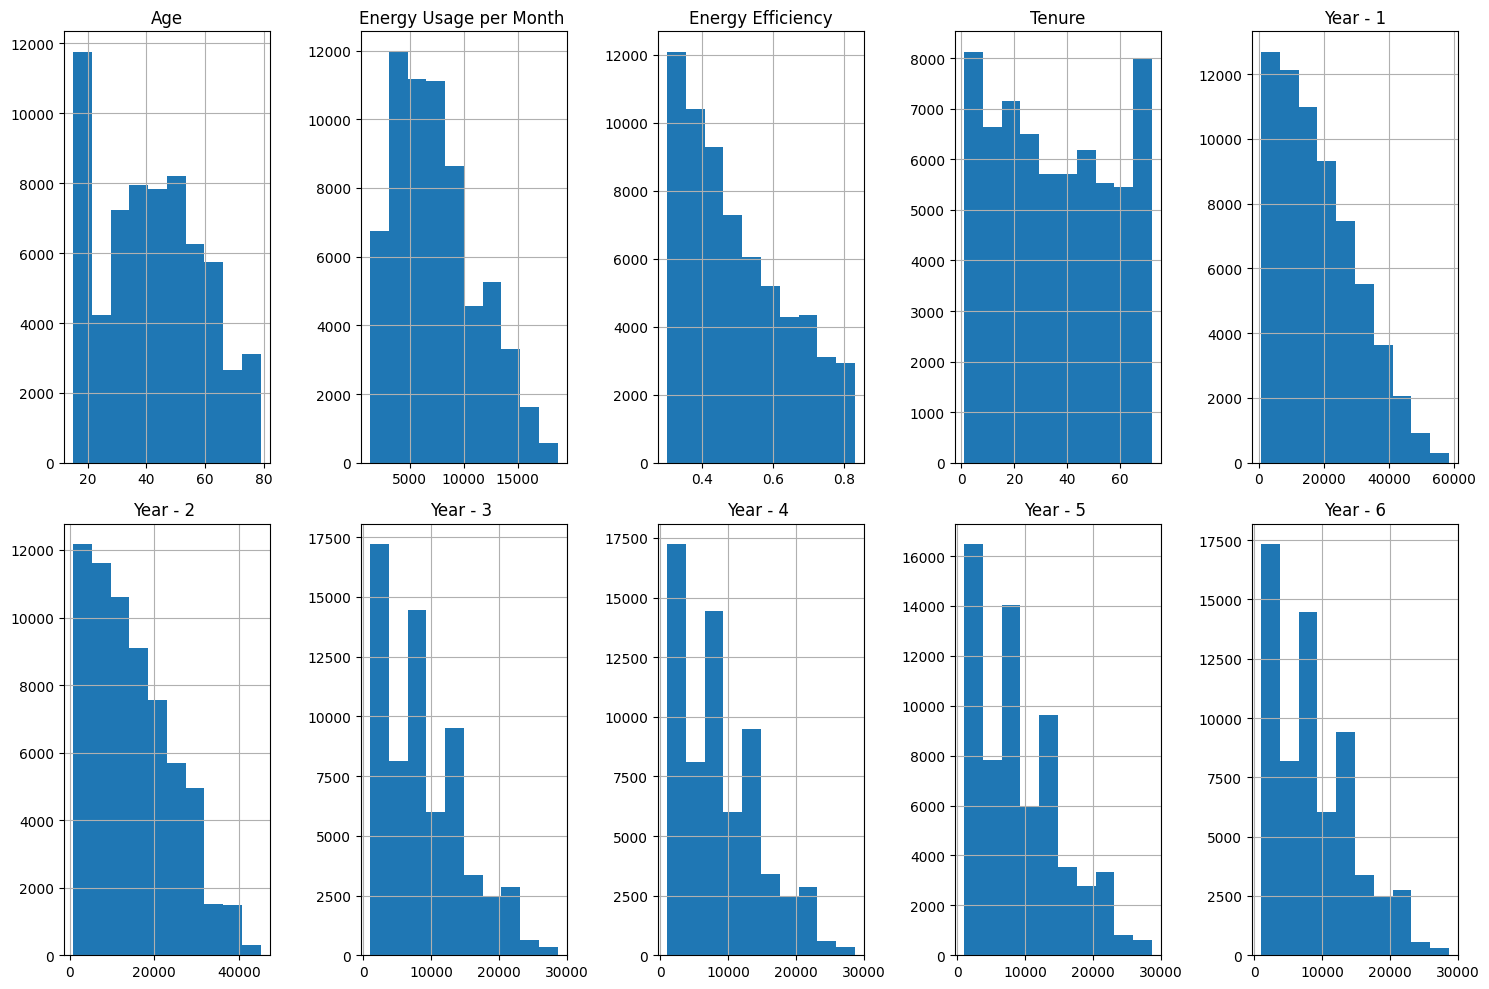

In [354]:
# Create a subplot grid that accommodates all the histograms
fig, axes = plt.subplots(2, 5, figsize=(15, 10))

# Create histograms for each variable
df['AGE'].hist(ax=axes[0, 0])
axes[0, 0].set_title('Age')

df['ENERGY_USAGE_PER_MONTH'].hist(ax=axes[0, 1])
axes[0, 1].set_title('Energy Usage per Month ')

df['ENERGY_EFFICIENCY'].hist(ax=axes[0, 2])
axes[0, 2].set_title('Energy Efficiency')

df['TENURE'].hist(ax=axes[0, 3])
axes[0, 3].set_title('Tenure')

df['STD_YRLY_USAGE_CUR_YEAR_MINUS_1'].hist(ax=axes[0, 4])
axes[0, 4].set_title('Year - 1')

df['STD_YRLY_USAGE_CUR_YEAR_MINUS_2'].hist(ax=axes[1, 0])
axes[1, 0].set_title('Year - 2 ')

df['STD_YRLY_USAGE_CUR_YEAR_MINUS_3'].hist(ax=axes[1, 1])
axes[1, 1].set_title('Year - 3 ')

df['STD_YRLY_USAGE_CUR_YEAR_MINUS_4'].hist(ax=axes[1, 2])
axes[1, 2].set_title('Year - 4 ')

df['STD_YRLY_USAGE_CUR_YEAR_MINUS_5'].hist(ax=axes[1, 3])
axes[1, 3].set_title('Year - 5 ')

df['STD_YRLY_USAGE_CUR_YEAR_MINUS_6'].hist(ax=axes[1, 4])
axes[1, 4].set_title('Year - 6')

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

Bivariate analysis

In [355]:
df.columns

Index(['CUSTOMER_ID', 'GENDER_ID', 'AGE', 'ENERGY_USAGE_PER_MONTH',
       'ENERGY_EFFICIENCY', 'IS_REGISTERED_FOR_ALERTS', 'OWNS_HOME',
       'COMPLAINTS', 'ATTRITION_STATUS', 'HAS_THERMOSTAT',
       'HAS_HOME_AUTOMATION', 'PV_ZONING', 'WIND_ZONING',
       'SMART_METER_COMMENTS', 'IS_CAR_OWNER', 'HAS_EV', 'HAS_PV', 'HAS_WIND',
       'TENURE', 'EBILL', 'IN_WARRANTY', 'CITY', 'CURRENT_OFFER',
       'CURRENT_CONTRACT', 'CURRENT_ISSUE', 'MARITAL_STATUS', 'EDUCATION',
       'SEGMENT', 'EMPLOYMENT', 'STD_YRLY_USAGE_CUR_YEAR_MINUS_1',
       'STD_YRLY_USAGE_CUR_YEAR_MINUS_2', 'STD_YRLY_USAGE_CUR_YEAR_MINUS_3',
       'STD_YRLY_USAGE_CUR_YEAR_MINUS_4', 'STD_YRLY_USAGE_CUR_YEAR_MINUS_5',
       'STD_YRLY_USAGE_CUR_YEAR_MINUS_6', 'STD_YRLY_USAGE_CUR_YEAR_MINUS_7',
       'MEDIAN_YRLY_USAGE_CUR_YEAR_MINUS_1'],
      dtype='object')

<Axes: xlabel='ATTRITION_STATUS', ylabel='TENURE'>

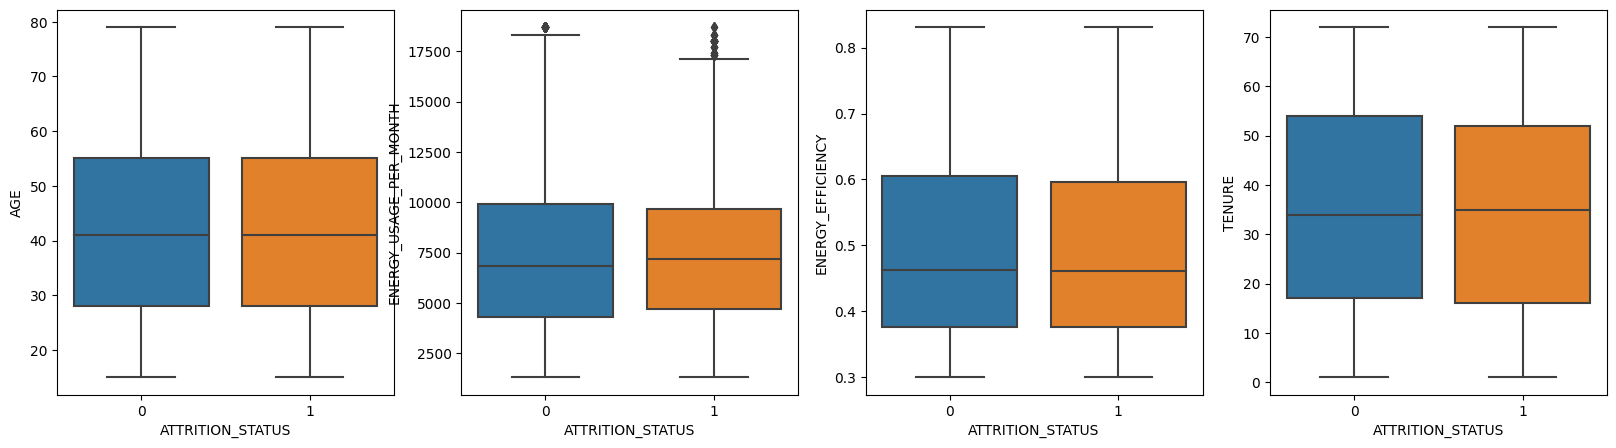

In [356]:
#Then we can use boxplot to display each of the continous variable
fig, (ax1, ax2, ax3,ax4) = plt.subplots(1,4, figsize=(20,5))
sns.boxplot(x='ATTRITION_STATUS', y='AGE', data=df, ax=ax1)
sns.boxplot(x='ATTRITION_STATUS', y='ENERGY_USAGE_PER_MONTH', data=df, ax=ax2)
sns.boxplot(x='ATTRITION_STATUS', y='ENERGY_EFFICIENCY', data=df, ax=ax3)
sns.boxplot(x='ATTRITION_STATUS', y='TENURE', data=df, ax=ax4)

Age, Energy Efficiency and Tenure don't seem significant enough for the model

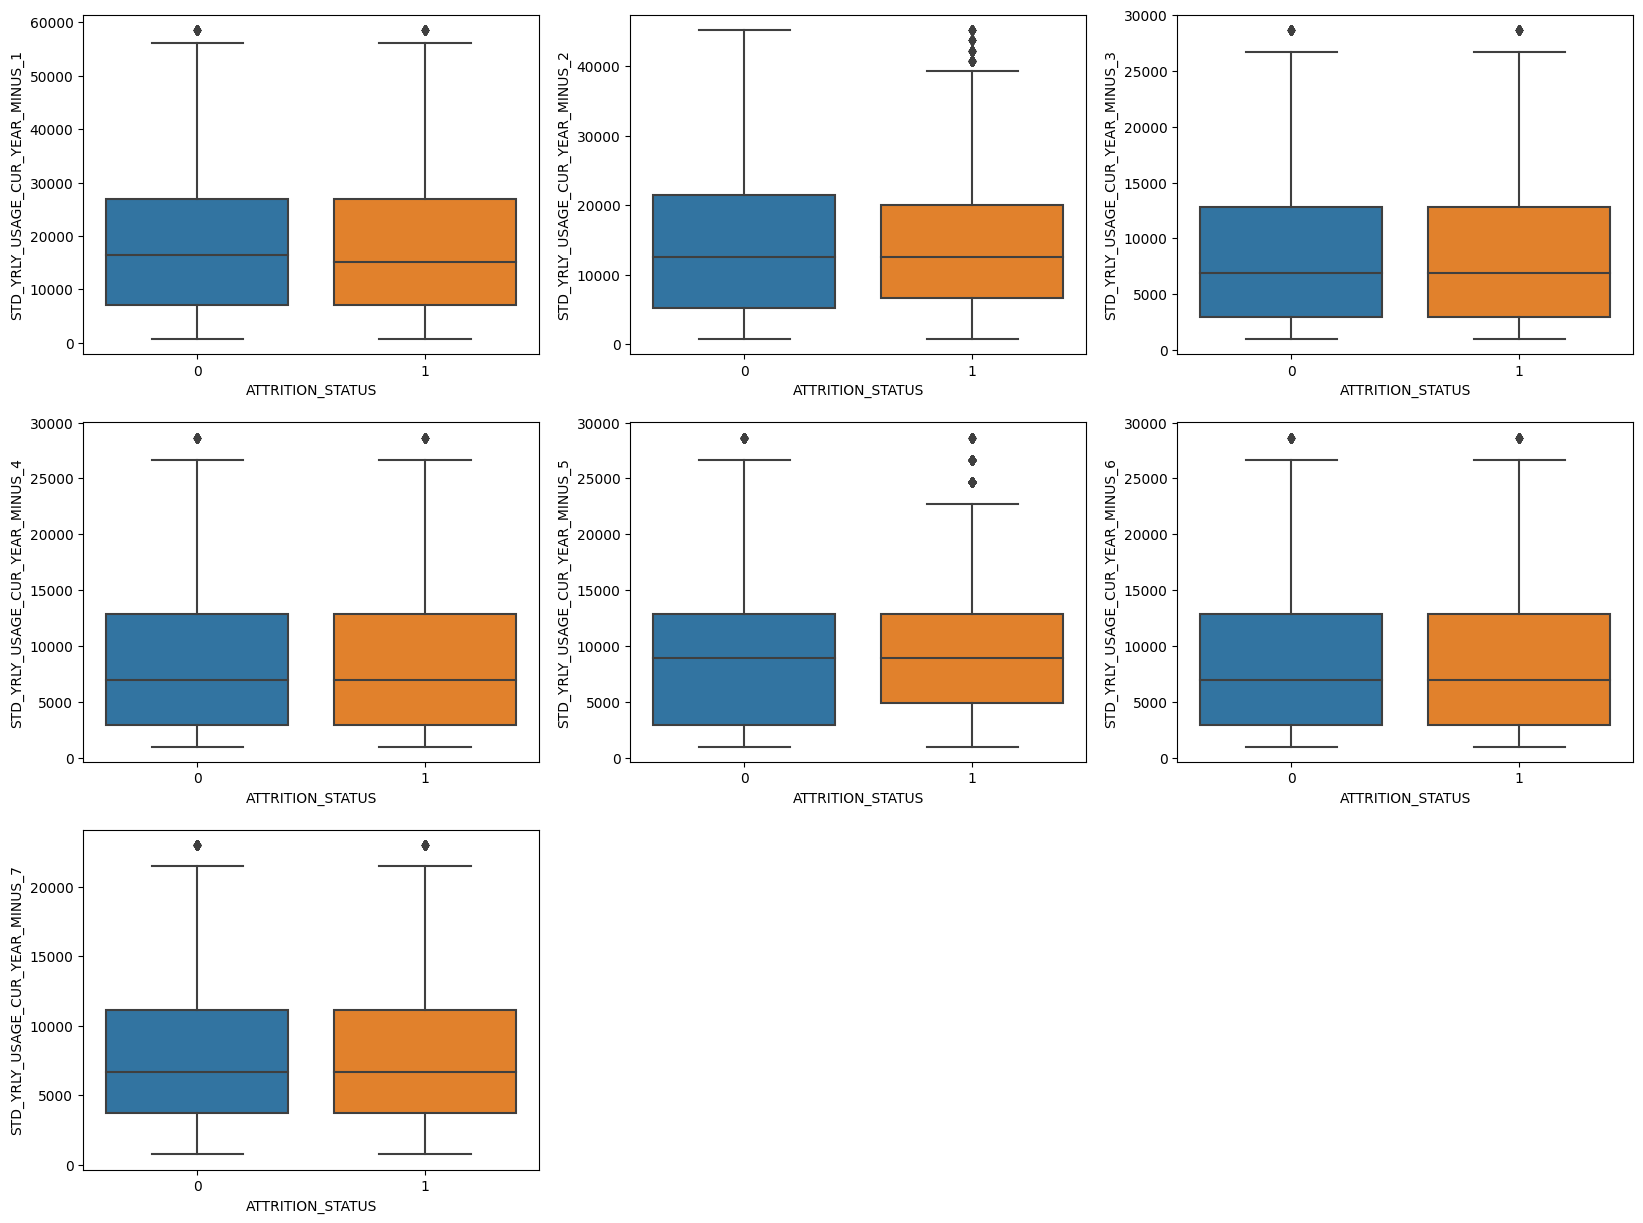

In [357]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(20, 15))

sns.boxplot(x='ATTRITION_STATUS', y='STD_YRLY_USAGE_CUR_YEAR_MINUS_1', data=df, ax=ax1)
sns.boxplot(x='ATTRITION_STATUS', y='STD_YRLY_USAGE_CUR_YEAR_MINUS_2', data=df, ax=ax2)
sns.boxplot(x='ATTRITION_STATUS', y='STD_YRLY_USAGE_CUR_YEAR_MINUS_3', data=df, ax=ax3)
sns.boxplot(x='ATTRITION_STATUS', y='STD_YRLY_USAGE_CUR_YEAR_MINUS_4', data=df, ax=ax4)
sns.boxplot(x='ATTRITION_STATUS', y='STD_YRLY_USAGE_CUR_YEAR_MINUS_5', data=df, ax=ax5)
sns.boxplot(x='ATTRITION_STATUS', y='STD_YRLY_USAGE_CUR_YEAR_MINUS_6', data=df, ax=ax6)
sns.boxplot(x='ATTRITION_STATUS', y='STD_YRLY_USAGE_CUR_YEAR_MINUS_7', data=df, ax=ax7)




# If you have extra subplots you don't need, you can turn them off
ax8.axis('off')
ax9.axis('off')

plt.show()

STD_YRLY_USAGE_CUR_YEAR_MINUS_2 and STD_YRLY_USAGE_CUR_YEAR_MINUS_7 seem significant, rest doesn't show a different behaviour with respect to the target variable.

In [358]:
df.columns

Index(['CUSTOMER_ID', 'GENDER_ID', 'AGE', 'ENERGY_USAGE_PER_MONTH',
       'ENERGY_EFFICIENCY', 'IS_REGISTERED_FOR_ALERTS', 'OWNS_HOME',
       'COMPLAINTS', 'ATTRITION_STATUS', 'HAS_THERMOSTAT',
       'HAS_HOME_AUTOMATION', 'PV_ZONING', 'WIND_ZONING',
       'SMART_METER_COMMENTS', 'IS_CAR_OWNER', 'HAS_EV', 'HAS_PV', 'HAS_WIND',
       'TENURE', 'EBILL', 'IN_WARRANTY', 'CITY', 'CURRENT_OFFER',
       'CURRENT_CONTRACT', 'CURRENT_ISSUE', 'MARITAL_STATUS', 'EDUCATION',
       'SEGMENT', 'EMPLOYMENT', 'STD_YRLY_USAGE_CUR_YEAR_MINUS_1',
       'STD_YRLY_USAGE_CUR_YEAR_MINUS_2', 'STD_YRLY_USAGE_CUR_YEAR_MINUS_3',
       'STD_YRLY_USAGE_CUR_YEAR_MINUS_4', 'STD_YRLY_USAGE_CUR_YEAR_MINUS_5',
       'STD_YRLY_USAGE_CUR_YEAR_MINUS_6', 'STD_YRLY_USAGE_CUR_YEAR_MINUS_7',
       'MEDIAN_YRLY_USAGE_CUR_YEAR_MINUS_1'],
      dtype='object')

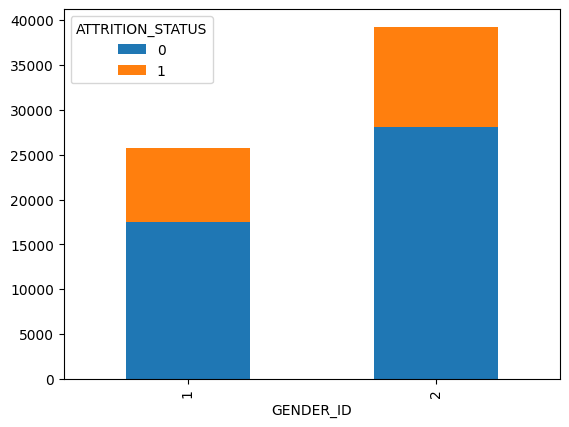

In [359]:
crosstab = pd.crosstab(df['GENDER_ID'], df['ATTRITION_STATUS'])
crosstab.plot(kind='bar', stacked=True)
plt.show()

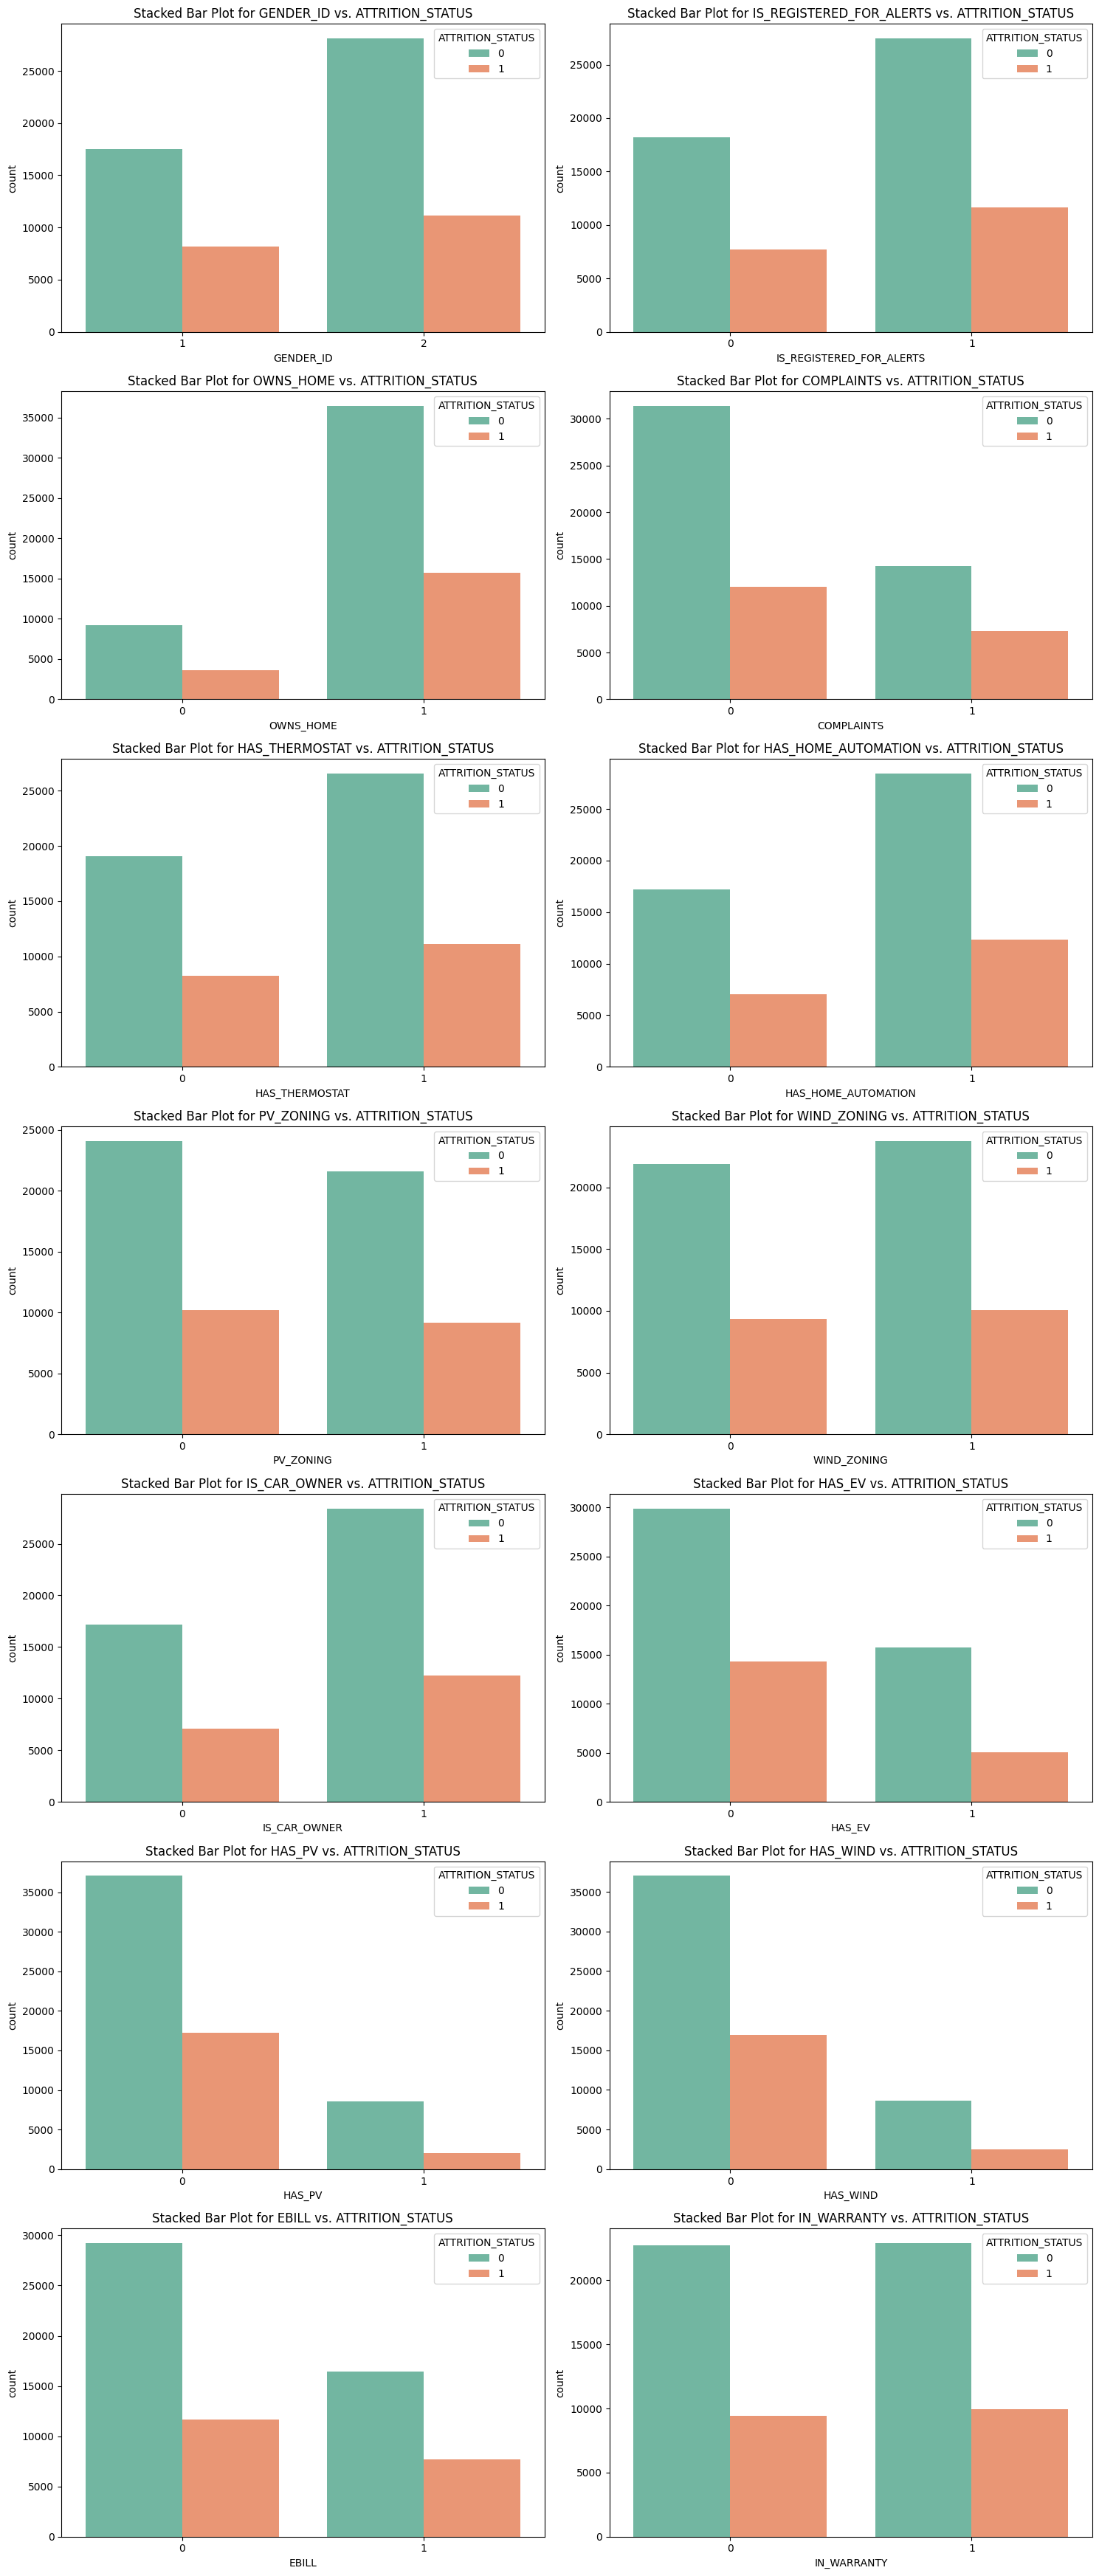

In [360]:
Categorical_variables= [ 'GENDER_ID', 'IS_REGISTERED_FOR_ALERTS', 'OWNS_HOME',
       'COMPLAINTS', 'HAS_THERMOSTAT',
       'HAS_HOME_AUTOMATION', 'PV_ZONING', 'WIND_ZONING',
        'IS_CAR_OWNER', 'HAS_EV', 'HAS_PV', 'HAS_WIND',
        'EBILL', 'IN_WARRANTY']

# Set the number of plots per row
plots_per_row = 2

# Calculate the number of rows needed
num_rows = (len(Categorical_variables) + plots_per_row - 1) // plots_per_row

# Create subplots
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(15, 5 * num_rows))

# Flatten the axes if there is only one row
axes = axes.flatten()

# Plot each categorical variable
for i, cat_var in enumerate(Categorical_variables):
    sns.countplot(x=cat_var, hue='ATTRITION_STATUS', data=df, palette='Set2', ax=axes[i])
    axes[i].set_title(f'Stacked Bar Plot for {cat_var} vs. ATTRITION_STATUS')
    axes[i].legend(title='ATTRITION_STATUS')

# Turn off extra subplots if there are any
for j in range(len(Categorical_variables), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

IN_WARRANTY and WIND_ZONING can be dropped as well

In [361]:
df.columns

Index(['CUSTOMER_ID', 'GENDER_ID', 'AGE', 'ENERGY_USAGE_PER_MONTH',
       'ENERGY_EFFICIENCY', 'IS_REGISTERED_FOR_ALERTS', 'OWNS_HOME',
       'COMPLAINTS', 'ATTRITION_STATUS', 'HAS_THERMOSTAT',
       'HAS_HOME_AUTOMATION', 'PV_ZONING', 'WIND_ZONING',
       'SMART_METER_COMMENTS', 'IS_CAR_OWNER', 'HAS_EV', 'HAS_PV', 'HAS_WIND',
       'TENURE', 'EBILL', 'IN_WARRANTY', 'CITY', 'CURRENT_OFFER',
       'CURRENT_CONTRACT', 'CURRENT_ISSUE', 'MARITAL_STATUS', 'EDUCATION',
       'SEGMENT', 'EMPLOYMENT', 'STD_YRLY_USAGE_CUR_YEAR_MINUS_1',
       'STD_YRLY_USAGE_CUR_YEAR_MINUS_2', 'STD_YRLY_USAGE_CUR_YEAR_MINUS_3',
       'STD_YRLY_USAGE_CUR_YEAR_MINUS_4', 'STD_YRLY_USAGE_CUR_YEAR_MINUS_5',
       'STD_YRLY_USAGE_CUR_YEAR_MINUS_6', 'STD_YRLY_USAGE_CUR_YEAR_MINUS_7',
       'MEDIAN_YRLY_USAGE_CUR_YEAR_MINUS_1'],
      dtype='object')

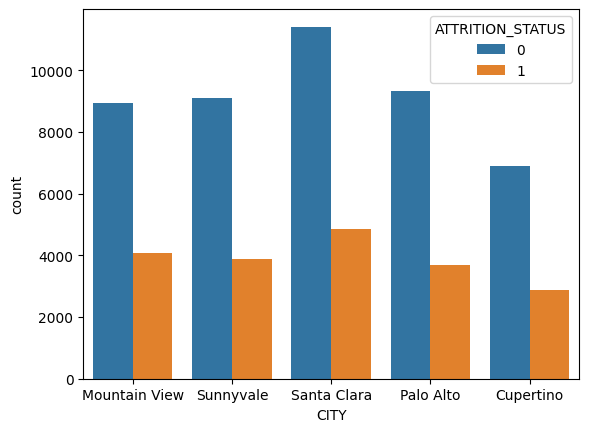

In [362]:

sns.countplot(x='CITY', hue='ATTRITION_STATUS', data=df)
plt.show()

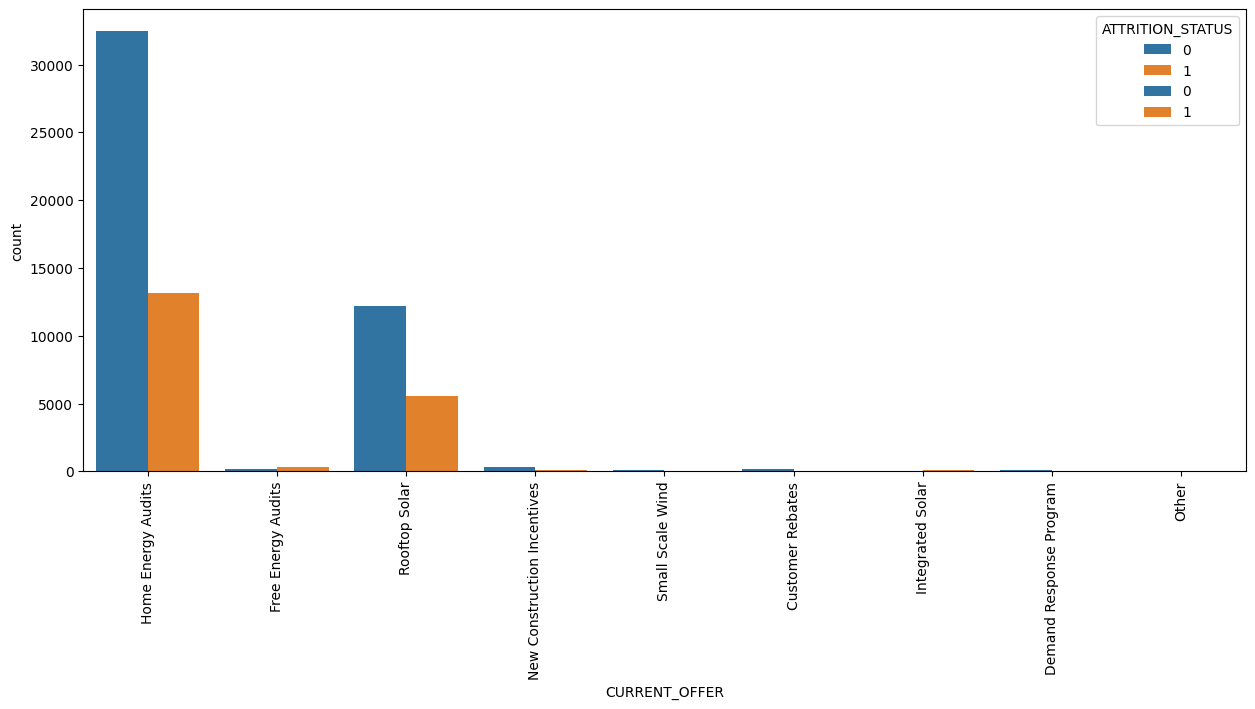

In [363]:

plt.figure(figsize=(15, 6))  # Set the size you prefer
sns.countplot(x='CURRENT_OFFER', hue='ATTRITION_STATUS', data=df)

ax = sns.countplot(x='CURRENT_OFFER', hue='ATTRITION_STATUS', data=df)
# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

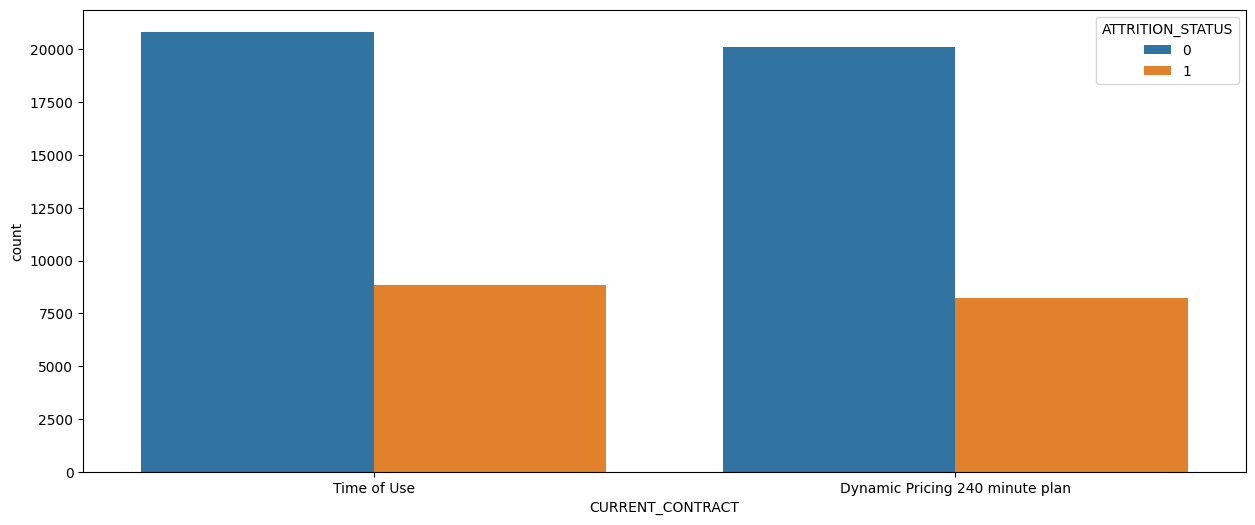

In [364]:

plt.figure(figsize=(15, 6))  # Set the size you prefer
sns.countplot(x='CURRENT_CONTRACT', hue='ATTRITION_STATUS', data=df)



plt.show()

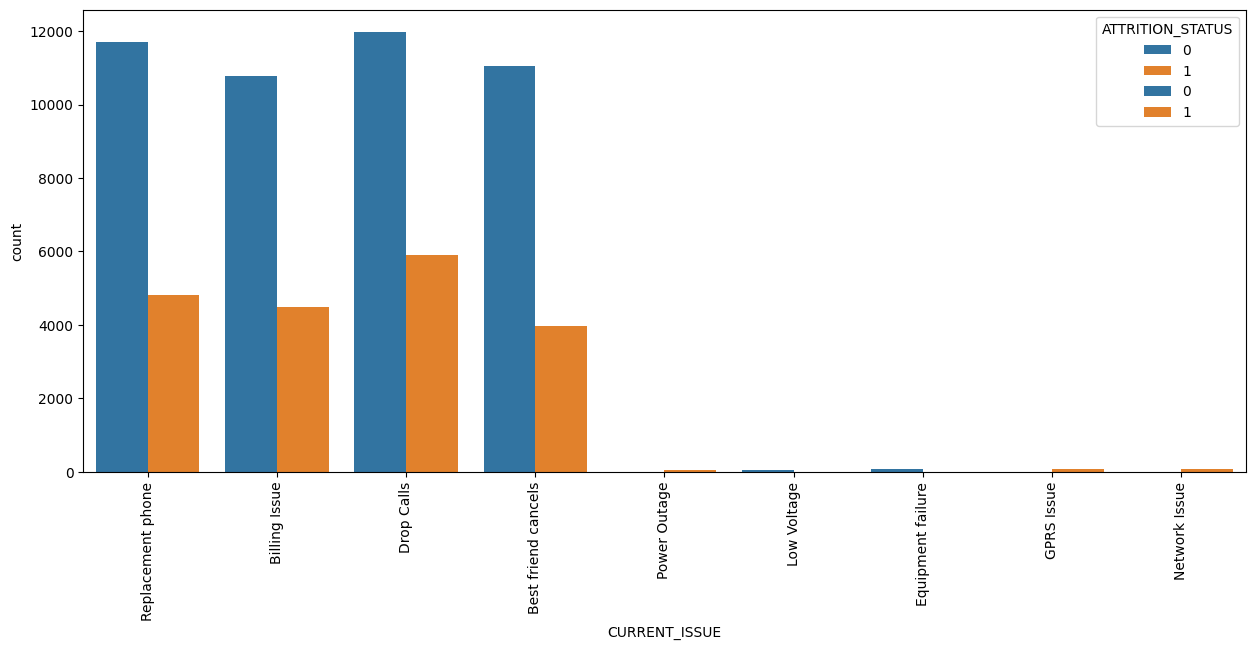

In [365]:

plt.figure(figsize=(15, 6))  # Set the size you prefer
sns.countplot(x='CURRENT_ISSUE', hue='ATTRITION_STATUS', data=df)

ax = sns.countplot(x='CURRENT_ISSUE', hue='ATTRITION_STATUS', data=df)
# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

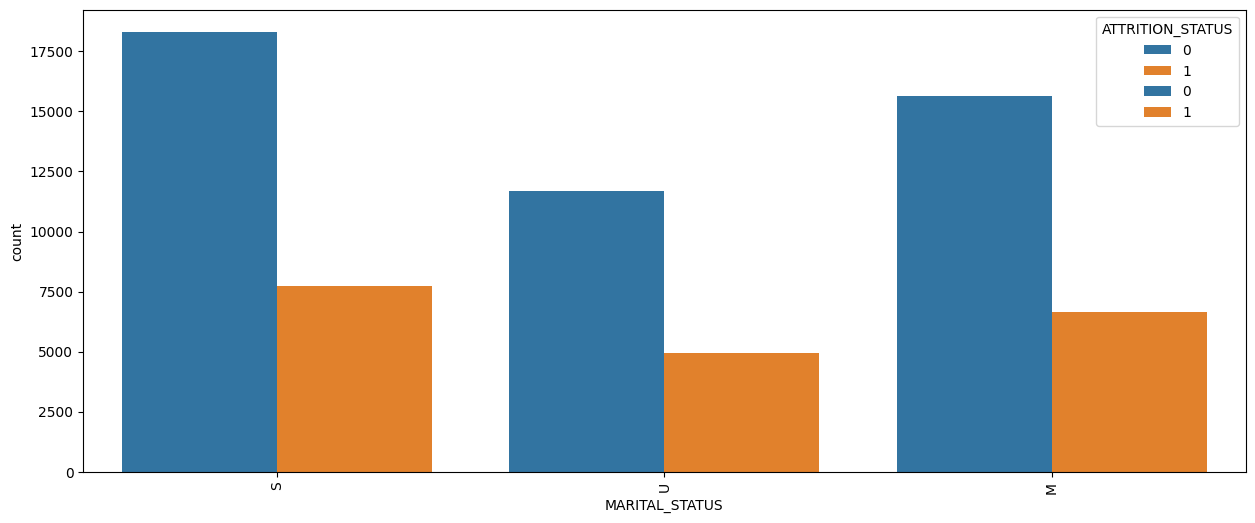

In [366]:
plt.figure(figsize=(15, 6))  # Set the size you prefer
sns.countplot(x='MARITAL_STATUS', hue='ATTRITION_STATUS', data=df)

ax = sns.countplot(x='MARITAL_STATUS', hue='ATTRITION_STATUS', data=df)
# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

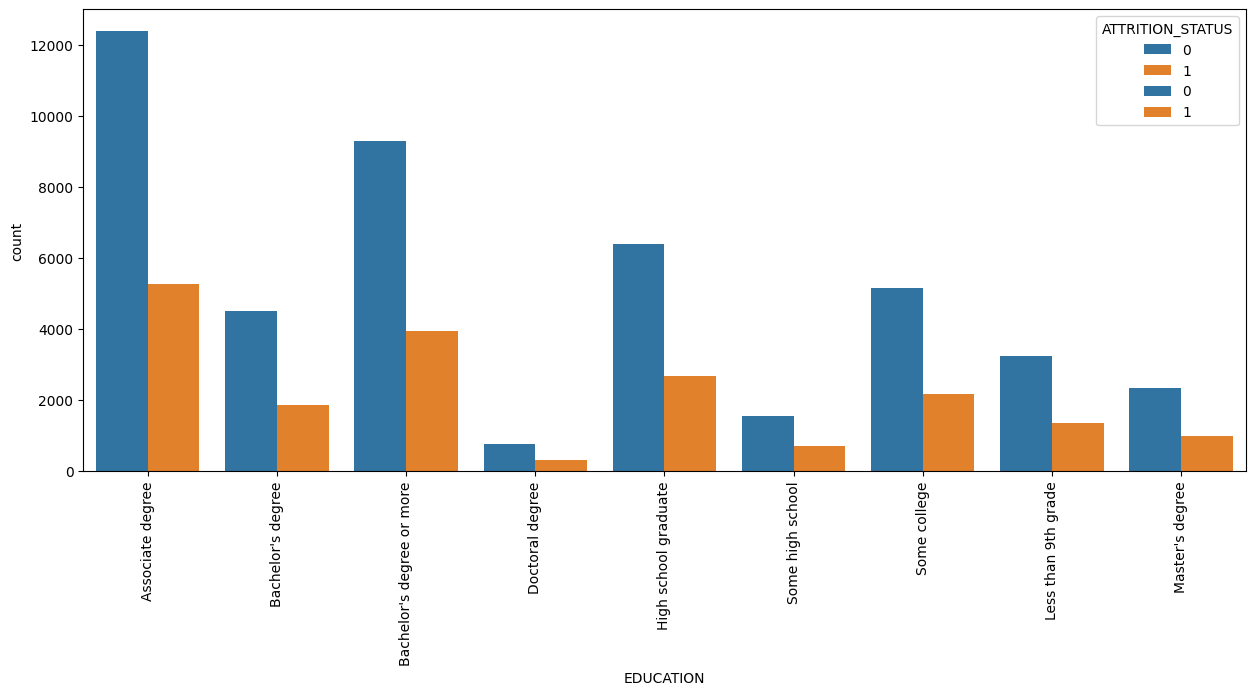

In [367]:
plt.figure(figsize=(15, 6))  # Set the size you prefer
sns.countplot(x='EDUCATION', hue='ATTRITION_STATUS', data=df)

ax = sns.countplot(x='EDUCATION', hue='ATTRITION_STATUS', data=df)
# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

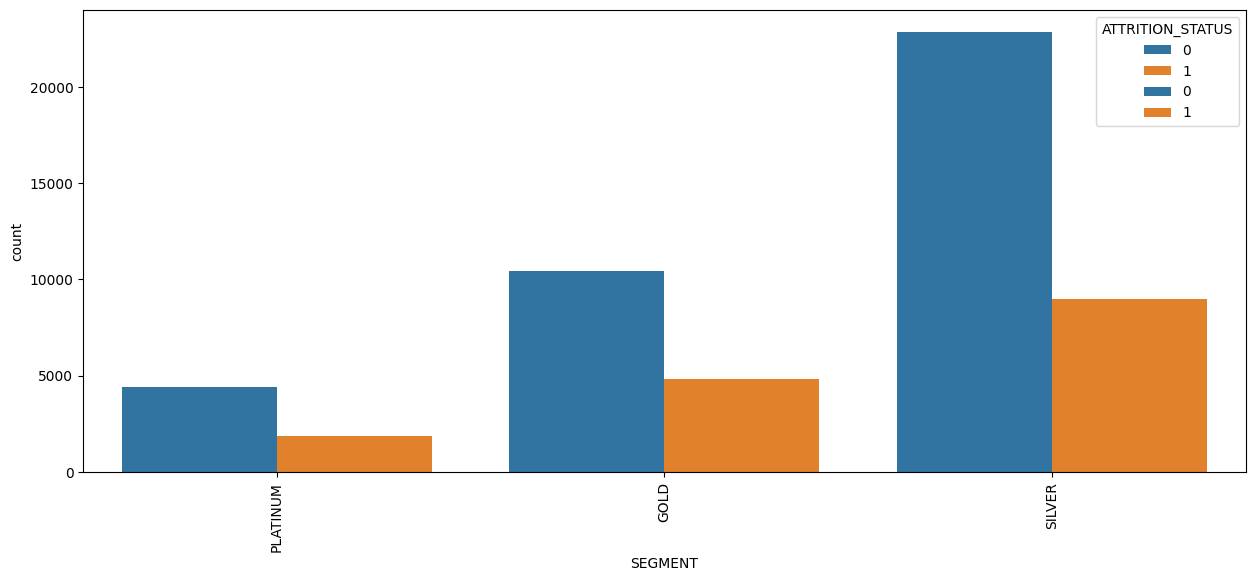

In [368]:
plt.figure(figsize=(15, 6))  # Set the size you prefer
sns.countplot(x='SEGMENT', hue='ATTRITION_STATUS', data=df)

ax = sns.countplot(x='SEGMENT', hue='ATTRITION_STATUS', data=df)
# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

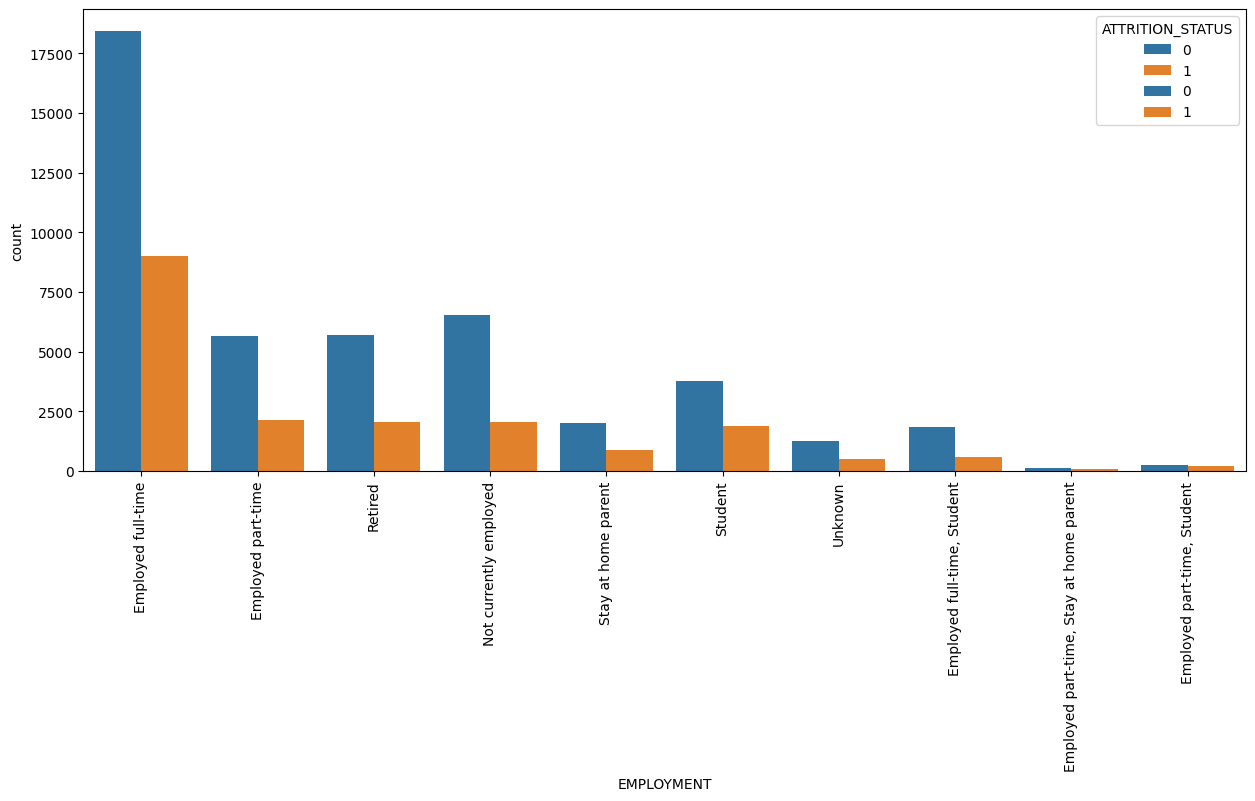

In [369]:
plt.figure(figsize=(15, 6))  # Set the size you prefer
sns.countplot(x='EMPLOYMENT', hue='ATTRITION_STATUS', data=df)

ax = sns.countplot(x='EMPLOYMENT', hue='ATTRITION_STATUS', data=df)
# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

Few suggestions abput the feature engineering

1. In Current Offer, everything but Home Energy Audits and Rooftop solars can be put into "Others" because of less volume
2. In Employment,  Employed part-time, stay-at-home parent and Employed part-time, Students can be clubbed together with Unknown to create a new variable "Others"


train test split

In [370]:
from sklearn.model_selection import train_test_split

In [371]:

X = df.drop('ATTRITION_STATUS', axis=1)  
y = df['ATTRITION_STATUS']  

In [372]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [373]:
X_train.describe()

,CUSTOMER_ID,GENDER_ID,AGE,ENERGY_USAGE_PER_MONTH,ENERGY_EFFICIENCY,IS_REGISTERED_FOR_ALERTS,OWNS_HOME,COMPLAINTS,HAS_THERMOSTAT,HAS_HOME_AUTOMATION,PV_ZONING,WIND_ZONING,IS_CAR_OWNER,HAS_EV,HAS_PV,HAS_WIND,TENURE,EBILL,IN_WARRANTY,STD_YRLY_USAGE_CUR_YEAR_MINUS_1,STD_YRLY_USAGE_CUR_YEAR_MINUS_2,STD_YRLY_USAGE_CUR_YEAR_MINUS_3,STD_YRLY_USAGE_CUR_YEAR_MINUS_4,STD_YRLY_USAGE_CUR_YEAR_MINUS_5,STD_YRLY_USAGE_CUR_YEAR_MINUS_6,STD_YRLY_USAGE_CUR_YEAR_MINUS_7,MEDIAN_YRLY_USAGE_CUR_YEAR_MINUS_1
count,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000
mean,32450.703308,1.603000,41.766500,7485.838654,0.497207,0.600942,0.803135,0.331654,0.578635,0.628615,0.473442,0.519327,0.626712,0.319385,0.163808,0.169365,35.529654,0.370462,0.505173,17966.031288,14122.404808,8818.475827,8808.751962,9201.685750,8750.631962,7205.642962,15312.705577
std,18760.381177,0.489281,17.295814,3803.690970,0.142700,0.489709,0.397634,0.470812,0.493783,0.483180,0.499299,0.499631,0.483682,0.466243,0.370105,0.375078,21.329300,0.482933,0.499978,12528.531226,9823.219028,6121.051274,6115.536229,6370.631017,6072.127478,5008.750336,10176.930213
min,1.000000,1.000000,15.000000,1310.000000,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,740.000000,740.000000,987.000000,987.000000,987.000000,987.000000,740.000000,3210.000000
25%,16219.750000,1.000000,28.000000,4360.000000,0.376000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,7160.000000,6666.000000,2963.000000,2963.000000,2963.000000,2963.000000,3703.000000,3210.000000
50%,32424.500000,2.000000,41.000000,6940.000000,0.462000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,34.000000,0.000000,1.000000,16543.000000,12592.000000,6913.000000,6913.000000,8888.000000,6913.000000,6666.000000,20500.000000
75%,48733.250000,2.000000,55.000000,9860.000000,0.602000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,54.000000,1.000000,1.000000,26913.000000,20000.000000,12839.000000,12839.000000,12839.000000,12839.000000,11111.000000,26900.000000
max,65000.000000,2.000000,79.000000,18700.000000,0.831000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,58518.000000,45185.000000,28642.000000,28642.000000,28642.000000,28642.000000,22963.000000,26900.000000


In [374]:
X_test.describe()

,CUSTOMER_ID,GENDER_ID,AGE,ENERGY_USAGE_PER_MONTH,ENERGY_EFFICIENCY,IS_REGISTERED_FOR_ALERTS,OWNS_HOME,COMPLAINTS,HAS_THERMOSTAT,HAS_HOME_AUTOMATION,PV_ZONING,WIND_ZONING,IS_CAR_OWNER,HAS_EV,HAS_PV,HAS_WIND,TENURE,EBILL,IN_WARRANTY,STD_YRLY_USAGE_CUR_YEAR_MINUS_1,STD_YRLY_USAGE_CUR_YEAR_MINUS_2,STD_YRLY_USAGE_CUR_YEAR_MINUS_3,STD_YRLY_USAGE_CUR_YEAR_MINUS_4,STD_YRLY_USAGE_CUR_YEAR_MINUS_5,STD_YRLY_USAGE_CUR_YEAR_MINUS_6,STD_YRLY_USAGE_CUR_YEAR_MINUS_7,MEDIAN_YRLY_USAGE_CUR_YEAR_MINUS_1
count,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000
mean,32699.686769,1.608000,41.856692,7416.245385,0.497586,0.601231,0.797462,0.333385,0.585462,0.620538,0.471231,0.522692,0.623154,0.320769,0.165385,0.176077,35.511385,0.373154,0.504308,18038.036385,14163.007538,8845.145846,8836.028923,9230.784769,8777.682385,7226.356154,15272.901538
std,18778.010058,0.488215,17.316235,3760.915976,0.142788,0.489664,0.401907,0.471441,0.492661,0.485272,0.499191,0.499504,0.484614,0.466790,0.371542,0.380900,21.429899,0.483661,0.500001,12583.923497,9890.443735,6162.575435,6157.338872,6411.692939,6114.295386,5036.993200,10171.042307
min,5.000000,1.000000,15.000000,1310.000000,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,740.000000,740.000000,987.000000,987.000000,987.000000,987.000000,740.000000,3210.000000
25%,16357.750000,1.000000,28.000000,4330.000000,0.377000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,7160.000000,6666.000000,2963.000000,2963.000000,2963.000000,2963.000000,3703.000000,3210.000000
50%,32713.500000,2.000000,42.000000,6870.000000,0.463000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,34.000000,0.000000,1.000000,16543.000000,12592.000000,6913.000000,6913.000000,8888.000000,6913.000000,6666.000000,20500.000000
75%,48893.000000,2.000000,55.000000,9770.000000,0.602000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,54.000000,1.000000,1.000000,26913.000000,21481.000000,12839.000000,12839.000000,12839.000000,12839.000000,11111.000000,26900.000000
max,64992.000000,2.000000,79.000000,18700.000000,0.831000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,58518.000000,45185.000000,28642.000000,28642.000000,28642.000000,28642.000000,22963.000000,26900.000000


In [375]:
y_train.describe()

count    52000.000000
mean         0.298788
std          0.457731
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: ATTRITION_STATUS, dtype: float64

In [376]:
y_test.describe()

count    13000.000000
mean         0.293923
std          0.455575
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: ATTRITION_STATUS, dtype: float64

In [377]:
# Count of unique values in y_train
unique_values_train = y_train.value_counts()

# Count of unique values in y_test
unique_values_test = y_test.value_counts()

print("Count of unique values in y_train:")
print(unique_values_train)

print("\nCount of unique values in y_test:")
print(unique_values_test)

Count of unique values in y_train:
ATTRITION_STATUS
0    36463
1    15537
Name: count, dtype: int64

Count of unique values in y_test:
ATTRITION_STATUS
0    9179
1    3821
Name: count, dtype: int64


In [378]:
pip install openpyxl

In [379]:
X_train.to_excel('C:\Amita\RISC Internship\X_train.xlsx', index=False)
X_test.to_excel('C:\Amita\RISC Internship\X_test.xlsx', index=False)
y_train.to_excel('C:\Amita\RISC Internship\y_train.xlsx', index=False)
y_test.to_excel('C:\Amita\RISC Internship\y_test.xlsx', index=False)

In [380]:
import numpy as np

In [381]:
df.columns

Index(['CUSTOMER_ID', 'GENDER_ID', 'AGE', 'ENERGY_USAGE_PER_MONTH',
       'ENERGY_EFFICIENCY', 'IS_REGISTERED_FOR_ALERTS', 'OWNS_HOME',
       'COMPLAINTS', 'ATTRITION_STATUS', 'HAS_THERMOSTAT',
       'HAS_HOME_AUTOMATION', 'PV_ZONING', 'WIND_ZONING',
       'SMART_METER_COMMENTS', 'IS_CAR_OWNER', 'HAS_EV', 'HAS_PV', 'HAS_WIND',
       'TENURE', 'EBILL', 'IN_WARRANTY', 'CITY', 'CURRENT_OFFER',
       'CURRENT_CONTRACT', 'CURRENT_ISSUE', 'MARITAL_STATUS', 'EDUCATION',
       'SEGMENT', 'EMPLOYMENT', 'STD_YRLY_USAGE_CUR_YEAR_MINUS_1',
       'STD_YRLY_USAGE_CUR_YEAR_MINUS_2', 'STD_YRLY_USAGE_CUR_YEAR_MINUS_3',
       'STD_YRLY_USAGE_CUR_YEAR_MINUS_4', 'STD_YRLY_USAGE_CUR_YEAR_MINUS_5',
       'STD_YRLY_USAGE_CUR_YEAR_MINUS_6', 'STD_YRLY_USAGE_CUR_YEAR_MINUS_7',
       'MEDIAN_YRLY_USAGE_CUR_YEAR_MINUS_1'],
      dtype='object')

In [382]:
cat_columns = ['GENDER_ID', 'AGE', 'ENERGY_USAGE_PER_MONTH',
       'ENERGY_EFFICIENCY', 'IS_REGISTERED_FOR_ALERTS', 'OWNS_HOME',
       'COMPLAINTS', 'HAS_THERMOSTAT',
       'HAS_HOME_AUTOMATION', 'PV_ZONING', 'WIND_ZONING',
       'SMART_METER_COMMENTS', 'IS_CAR_OWNER', 'HAS_EV', 'HAS_PV', 'HAS_WIND',
       'TENURE', 'EBILL', 'IN_WARRANTY', 'CITY', 'CURRENT_OFFER',
       'CURRENT_CONTRACT', 'CURRENT_ISSUE', 'MARITAL_STATUS', 'EDUCATION',
       'SEGMENT', 'EMPLOYMENT']

In [383]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline  # Import the Pipeline class
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

In [384]:
# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# One-hot encode the categorical data
encoder = OneHotEncoder(sparse=False)
encoded_categorical_data = encoder.fit_transform(df[categorical_cols])

# Create a DataFrame for the encoded data
encoded_categorical_df = pd.DataFrame(encoded_categorical_data, 
                                      columns=encoder.get_feature_names_out(categorical_cols))

# Scale numeric data to be non-negative
scaler = MinMaxScaler()
scaled_numeric_data = scaler.fit_transform(df[numeric_cols])
scaled_numeric_df = pd.DataFrame(scaled_numeric_data, columns=numeric_cols)

# Concatenate the scaled numeric data and the encoded categorical data
final_data = pd.concat([scaled_numeric_df, encoded_categorical_df], axis=1)

# Concatenate the numeric data and the encoded categorical data
final_data = pd.concat([df[numeric_cols], encoded_categorical_df], axis=1)
# Remove the target variable from the feature set
final_data = final_data.drop(columns=['ATTRITION_STATUS', 'CUSTOMER_ID'])

# SelectKBest to select the top k features
k = 5  # Number of top features to select
selector = SelectKBest(f_classif, k=k)

# Assume y is your target variable
y = df['ATTRITION_STATUS']  # Replace this with your actual target variable

# Fit and transform the data
X_new = selector.fit_transform(final_data, y)

# Get scores for each feature
feature_scores = selector.scores_

# Creating a DataFrame with features and scores
feature_scores_df = pd.DataFrame({'Feature': final_data.columns, 'Score': feature_scores})

# Sorting the DataFrame based on the score in descending order
feature_scores_df = feature_scores_df.sort_values(by='Score', ascending=False)

# Set display options
pd.set_option('display.max_rows', None)

# Print the DataFrame
print(feature_scores_df)





c:\Users\singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


                                               Feature       Score
13                                              HAS_PV  653.107042
12                                              HAS_EV  444.959988
14                                            HAS_WIND  370.126190
6                                           COMPLAINTS  261.524759
36                    CURRENT_OFFER_Free Energy Audits  241.584760
71                       EMPLOYMENT_Employed full-time  210.928621
76                   EMPLOYMENT_Not currently employed  166.286067
40                                 CURRENT_OFFER_Other  140.558396
50                            CURRENT_ISSUE_GPRS Issue  134.177622
52                         CURRENT_ISSUE_Network Issue  127.945956
53                          CURRENT_ISSUE_Power Outage  121.863314
48                            CURRENT_ISSUE_Drop Calls  119.913571
38                      CURRENT_OFFER_Integrated Solar  117.059328
46                   CURRENT_ISSUE_Best friend cancels  109.46

In [385]:
X = df.drop(columns=['ATTRITION_STATUS'])  # Replace 'ATTRITION_STATUS' with your actual target column name
y = df['ATTRITION_STATUS']

# One-hot encode categorical variables
categorical_features = X.select_dtypes(include=['object', 'category']).columns
encoder = OneHotEncoder()
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_features]).toarray(), 
                         columns=encoder.get_feature_names_out(categorical_features))

# Drop original categorical columns and concatenate encoded ones
X = X.drop(columns=categorical_features)
X_final = pd.concat([X, X_encoded], axis=1)

# Apply SelectKBest to score all features
selector = SelectKBest(f_classif, k='all')
selector.fit(X_final, y)

# Get feature scores and create a DataFrame
feature_scores = pd.DataFrame({
    'Feature': X_final.columns,
    'Score': selector.scores_
})

# Sort the features by score
sorted_features = feature_scores.sort_values(by='Score', ascending=False)


# Group by original feature name and sum the scores
feature_importance = feature_scores.groupby(feature_scores['Feature'].str.split('_').str[0]).sum()

# Sort by the aggregated score
sorted_aggregated_features = feature_importance.sort_values(by='Score', ascending=False)

print(sorted_aggregated_features)

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Feature        Score
Feature                                                                                                                                                                                                                                                                                                                                                         

In [386]:
df.dtypes

CUSTOMER_ID                             int64
GENDER_ID                               int64
AGE                                     int64
ENERGY_USAGE_PER_MONTH                  int64
ENERGY_EFFICIENCY                     float64
IS_REGISTERED_FOR_ALERTS                int64
OWNS_HOME                               int64
COMPLAINTS                              int64
ATTRITION_STATUS                        int64
HAS_THERMOSTAT                          int64
HAS_HOME_AUTOMATION                     int64
PV_ZONING                               int64
WIND_ZONING                             int64
SMART_METER_COMMENTS                   object
IS_CAR_OWNER                            int64
HAS_EV                                  int64
HAS_PV                                  int64
HAS_WIND                                int64
TENURE                                  int64
EBILL                                   int64
IN_WARRANTY                             int64
CITY                              

In [387]:
df['CURRENT_CONTRACT'] = df['CURRENT_CONTRACT'].fillna('Unknown')

In [388]:
df['SEGMENT'] = df['SEGMENT'].fillna('Unknown')

In [389]:
df['SMART_METER_COMMENTS'].unique()

array(['Negative', 'Neutral', 'Positive'], dtype=object)

In [390]:

meter_mapping = {'Negative':1, 'Neutral':2, 'Positive':3}
df['SMART_METER_COMMENTS'] = df['SMART_METER_COMMENTS'].map(meter_mapping) 

In [391]:
df['CITY'].unique()

array(['Mountain View', 'Sunnyvale', 'Santa Clara', 'Palo Alto',
       'Cupertino'], dtype=object)

In [392]:
city_mapping = {'Mountain View':1, 'Sunnyvale':2, 'Santa Clara':3, 'Palo Alto':4,
       'Cupertino':5}
df['CITY'] = df['CITY'].map(city_mapping) 

In [393]:
df['CURRENT_OFFER'].unique()

array(['Home Energy Audits', 'Free Energy Audits', 'Rooftop Solar',
       'New Construction Incentives', 'Small Scale Wind',
       'Customer Rebates', 'Integrated Solar', 'Demand Response Program',
       'Other'], dtype=object)

In [394]:
current_offer_mapping = {'Home Energy Audits':1, 'Free Energy Audits':2, 'Rooftop Solar':3,
       'New Construction Incentives':4, 'Small Scale Wind':5,
       'Customer Rebates':6, 'Integrated Solar':7, 'Demand Response Program':8,
       'Other':9}
df['CURRENT_OFFER'] = df['CURRENT_OFFER'].map(current_offer_mapping) 

In [395]:
df['CURRENT_CONTRACT'].unique()

array(['Time of Use', 'Dynamic Pricing 240 minute plan', 'Unknown'],
      dtype=object)

In [396]:
current_contract_mapping = {'Time of Use':1, 'Dynamic Pricing 240 minute plan':2, 'Unknown':3}
df['CURRENT_CONTRACT'] = df['CURRENT_CONTRACT'].map(current_contract_mapping) 

In [397]:
df['CURRENT_ISSUE'].unique()

array(['Replacement phone', 'Billing Issue', 'Drop Calls',
       'Best friend cancels', 'Power Outage', 'Low Voltage',
       'Equipment failure', 'GPRS Issue', 'Network Issue'], dtype=object)

In [398]:
current_issue_mapping = {'Replacement phone':1, 'Billing Issue':2, 'Drop Calls':3,
       'Best friend cancels':4, 'Power Outage':5, 'Low Voltage':6,
       'Equipment failure':7, 'GPRS Issue':8, 'Network Issue':9}
df['CURRENT_ISSUE'] = df['CURRENT_ISSUE'].map(current_issue_mapping) 

In [399]:
df['MARITAL_STATUS'].unique()

array(['S', 'U', 'M'], dtype=object)

In [400]:
marital_mapping = {'S':1, 'U':2, 'M':3}
df['MARITAL_STATUS'] = df['MARITAL_STATUS'].map(marital_mapping) 

In [401]:
df['EDUCATION'].unique()

array(['Associate degree', "Bachelor's degree",
       "Bachelor's degree or more", 'Doctoral degree',
       'High school graduate', 'Some high school', 'Some college',
       'Less than 9th grade', "Master's degree"], dtype=object)

In [402]:
education_mapping = {'Associate degree':1, "Bachelor's degree":2,
       "Bachelor's degree or more":3, 'Doctoral degree':4,
       'High school graduate':5, 'Some high school':6, 'Some college':7,
       'Less than 9th grade':8, "Master's degree":9}
df['EDUCATION'] = df['EDUCATION'].map(education_mapping) 

In [403]:
df['SEGMENT'].unique()

array(['PLATINUM', 'GOLD', 'SILVER', 'Unknown'], dtype=object)

In [404]:
segment_mapping = {'PLATINUM':1, 'GOLD':2, 'SILVER':3, 'Unknown':4}
df['SEGMENT'] = df['SEGMENT'].map(segment_mapping) 

In [405]:
df['EMPLOYMENT'].unique()

array(['Employed full-time', 'Employed part-time', 'Retired',
       'Not currently employed', 'Stay at home parent', 'Student',
       'Unknown', 'Employed full-time, Student',
       'Employed part-time, Stay at home parent',
       'Employed part-time, Student'], dtype=object)

In [406]:
employment_mapping = {'Employed full-time':1, 'Employed part-time':2, 'Retired':3,
       'Not currently employed':4, 'Stay at home parent':5, 'Student':6,
       'Unknown':7, 'Employed full-time, Student':8,
       'Employed part-time, Stay at home parent':9,
       'Employed part-time, Student':10}
df['EMPLOYMENT'] = df['EMPLOYMENT'].map(employment_mapping) 

In [407]:
df.head()

,CUSTOMER_ID,GENDER_ID,AGE,ENERGY_USAGE_PER_MONTH,ENERGY_EFFICIENCY,IS_REGISTERED_FOR_ALERTS,OWNS_HOME,COMPLAINTS,ATTRITION_STATUS,HAS_THERMOSTAT,HAS_HOME_AUTOMATION,PV_ZONING,WIND_ZONING,SMART_METER_COMMENTS,IS_CAR_OWNER,HAS_EV,HAS_PV,HAS_WIND,TENURE,EBILL,IN_WARRANTY,CITY,CURRENT_OFFER,CURRENT_CONTRACT,CURRENT_ISSUE,MARITAL_STATUS,EDUCATION,SEGMENT,EMPLOYMENT,STD_YRLY_USAGE_CUR_YEAR_MINUS_1,STD_YRLY_USAGE_CUR_YEAR_MINUS_2,STD_YRLY_USAGE_CUR_YEAR_MINUS_3,STD_YRLY_USAGE_CUR_YEAR_MINUS_4,STD_YRLY_USAGE_CUR_YEAR_MINUS_5,STD_YRLY_USAGE_CUR_YEAR_MINUS_6,STD_YRLY_USAGE_CUR_YEAR_MINUS_7,MEDIAN_YRLY_USAGE_CUR_YEAR_MINUS_1
0,1,2,44,5080,0.390,1,1,0,0,1,0,1,0,1,1,1,1,0,13,0,1,1,1,1,1,1,1,1,1,56049,43703,26666,26666,28642,26666,22963,20500
1,2,1,34,4970,0.356,0,1,1,1,1,0,1,0,1,1,0,0,0,11,0,1,1,2,2,2,2,2,2,1,52098,40740,26666,26666,26666,26666,21481,20500
2,3,1,39,9250,0.628,1,1,0,0,1,1,0,1,2,1,1,0,0,68,0,0,2,1,1,2,2,3,2,1,52098,40740,24691,24691,26666,24691,21481,20500
3,4,2,37,4330,0.335,1,1,0,1,0,0,0,1,3,1,1,0,0,33,0,1,3,3,1,2,3,3,3,1,52098,40740,24691,24691,26666,24691,20000,20500
4,5,2,54,9190,0.411,1,1,1,0,0,1,0,1,1,1,0,0,0,23,0,0,3,3,3,3,2,3,4,1,48148,37777,24691,24691,24691,24691,20000,20500


In [409]:
# Separate the features and the target variable
X = df.drop(columns=['ATTRITION_STATUS', 'CUSTOMER_ID'])  # Replace 'ATTRITION_STATUS' with your actual target column name
y = df['ATTRITION_STATUS']


# Apply SelectKBest to score all features
selector = SelectKBest(f_classif, k='all')
selector.fit(X, y)

# Get feature scores and create a DataFrame
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
})

# Sort the features by score
sorted_features = feature_scores.sort_values(by='Score', ascending=False)

# Display the sorted features
print(sorted_features)

                               Feature       Score
14                              HAS_PV  653.107042
13                              HAS_EV  444.959988
15                            HAS_WIND  370.126190
6                           COMPLAINTS  261.524759
0                            GENDER_ID   87.900113
17                               EBILL   75.525841
20                       CURRENT_OFFER   70.477155
26                          EMPLOYMENT   40.226648
34  MEDIAN_YRLY_USAGE_CUR_YEAR_MINUS_1   25.475987
19                                CITY   19.132559
16                              TENURE   17.868611
5                            OWNS_HOME   15.498521
8                  HAS_HOME_AUTOMATION    9.693614
11                SMART_METER_COMMENTS    9.000744
18                         IN_WARRANTY    7.936527
21                    CURRENT_CONTRACT    6.291175
12                        IS_CAR_OWNER    5.975125
3                    ENERGY_EFFICIENCY    3.874742
7                       HAS_THE